<a href="https://colab.research.google.com/github/ersozbasak/Machine-Learning-Regression-Models/blob/master/5__PJM_DATA_LSTM_op_77.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



```
# This is formatted as code
```

EVALUATION OF PJM VALUES

1. Introduction and Integration (Regularization the Data Set)
2. Machine Learning Integration
3. Deep Learning Integration


### Regularization the Data Set

In [1]:
import tensorflow as tf
from tensorflow.keras.callbacks import CSVLogger, EarlyStopping
from sklearn import metrics # for the evaluation
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from keras.preprocessing.sequence import TimeseriesGenerator
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns
import time
import gc
import sys
#mpl.rcParams['figure.figsize'] = (17, 5)
#mpl.rcParams['axes.grid'] = False
#sns.set_style("whitegrid")
from pandas import DataFrame , concat
from sklearn.metrics import mean_absolute_error , mean_squared_error
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
from numpy import mean , concatenate
from math import sqrt
from pandas import read_csv
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM,Activation,Dropout
from numpy import array , hstack
from tensorflow import keras
import tensorflow as tf
import csv

In [2]:

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%cd /content/drive/MyDrive/PJM_Values
%ls

/content/drive/MyDrive/PJM_Values
dataset.pkl                        rt_hrl_lmps_JUNE_AGU.csv
KNN_PJM_dataset.csv                rt_hrl_lmps_MARCH_MAY.csv
LSTM_PJM/                          rt_hrl_lmps_SEP_NOV.csv
rt_hrl_lmps_22JUNE_23JUNE_ALL.csv  structured_data_classifier/
rt_hrl_lmps_DEC_FEB.csv            structured_data_regressor/


In [4]:
df_22JUNE_23JUNE_ALL = pd.read_csv('/content/drive/MyDrive/PJM_Values/rt_hrl_lmps_22JUNE_23JUNE_ALL.csv',engine='python',encoding='utf-8')
#df_JUNE_AGU = pd.read_csv('/content/drive/MyDrive/PJM_Values/rt_hrl_lmps_JUNE_AGU.csv',engine='python',encoding='utf-8')
#df_SEP_NOV = pd.read_csv('/content/drive/MyDrive/PJM_Values/rt_hrl_lmps_SEP_NOV.csv',engine='python',encoding='utf-8')
#df_DEC_FEB = pd.read_csv('/content/drive/MyDrive/PJM_Values/rt_hrl_lmps_DEC_FEB.csv',engine='python',encoding='utf-8')
#df_MARCH_MAY = pd.read_csv('/content/drive/MyDrive/PJM_Values/rt_hrl_lmps_MARCH_MAY.csv',engine='python',encoding='utf-8')

In [5]:
"""lmp_DEC_FEB = df_DEC_FEB[df_DEC_FEB['VALUE'].isin(['LMP'])]
lmp_MARCH_MAY = df_MARCH_MAY[df_MARCH_MAY['VALUE'].isin(['LMP'])]
lmp_JUNE_AGU = df_JUNE_AGU[df_JUNE_AGU['VALUE'].isin(['LMP'])]
lmp_SEP_NOV = df_SEP_NOV[df_SEP_NOV['VALUE'].isin(['LMP'])]
loadzone_DEC_FEB = lmp_DEC_FEB[lmp_DEC_FEB['TYPE'].isin(['Loadzone'])]
loadzone_MARCH_MAY = lmp_MARCH_MAY[lmp_MARCH_MAY['TYPE'].isin(['Loadzone'])]
loadzone_JUNE_AGU = lmp_JUNE_AGU[lmp_JUNE_AGU['TYPE'].isin(['Loadzone'])]
loadzone_SEP_NOV = lmp_SEP_NOV[lmp_SEP_NOV['TYPE'].isin(['Loadzone'])]"""

"lmp_DEC_FEB = df_DEC_FEB[df_DEC_FEB['VALUE'].isin(['LMP'])]\nlmp_MARCH_MAY = df_MARCH_MAY[df_MARCH_MAY['VALUE'].isin(['LMP'])]\nlmp_JUNE_AGU = df_JUNE_AGU[df_JUNE_AGU['VALUE'].isin(['LMP'])]\nlmp_SEP_NOV = df_SEP_NOV[df_SEP_NOV['VALUE'].isin(['LMP'])]\nloadzone_DEC_FEB = lmp_DEC_FEB[lmp_DEC_FEB['TYPE'].isin(['Loadzone'])]\nloadzone_MARCH_MAY = lmp_MARCH_MAY[lmp_MARCH_MAY['TYPE'].isin(['Loadzone'])]\nloadzone_JUNE_AGU = lmp_JUNE_AGU[lmp_JUNE_AGU['TYPE'].isin(['Loadzone'])]\nloadzone_SEP_NOV = lmp_SEP_NOV[lmp_SEP_NOV['TYPE'].isin(['Loadzone'])]"

In [6]:
grouped_df_ALL = df_22JUNE_23JUNE_ALL.groupby('pnode_name')# Group HUB dataframe by the 'pnode_name' column
group_names_jm = grouped_df_ALL.groups.keys()# Get the names of each group = 12

In [7]:
len(group_names_jm)

12

In [8]:
df_list_22_23 = [ df_22JUNE_23JUNE_ALL]

for i in df_list_22_23:
    i.drop('datetime_beginning_utc', inplace=True, axis=1)
    i.drop('datetime_beginning_ept', inplace=True, axis=1)
    i.drop('pnode_id', inplace=True, axis=1)
    i.drop('voltage', inplace=True, axis=1)
    i.drop('equipment', inplace=True, axis=1)
    i.drop('type', inplace=True, axis=1)
    i.drop('zone', inplace=True, axis=1)
    i.drop('congestion_price_rt', inplace=True, axis=1)
    i.drop('marginal_loss_price_rt', inplace=True, axis=1)
    i.drop('system_energy_price_rt', inplace=True, axis=1)
    i.drop('row_is_current', inplace=True, axis=1)
    i.drop('version_nbr', inplace=True, axis=1)

In [9]:
print(df_22JUNE_23JUNE_ALL.dtypes)

pnode_name       object
total_lmp_rt    float64
dtype: object


In [10]:
df_22JUNE_23JUNE_ALL.head()

,pnode_name,total_lmp_rt
0,EASTERN HUB,69.669366
1,WEST INT HUB,67.783333
2,WESTERN HUB,68.755145
3,NEW JERSEY HUB,69.168388
4,CHICAGO GEN HUB,65.559705


In [11]:
common_nodes = set(df_22JUNE_23JUNE_ALL['pnode_name'].unique())
df_22JUNE_23JUNE_ALL_filtered=df_22JUNE_23JUNE_ALL[df_22JUNE_23JUNE_ALL['pnode_name'].isin(common_nodes)]


In [12]:
df_22JUNE_23JUNE_ALL_filtered

,pnode_name,total_lmp_rt
0,EASTERN HUB,69.669366
1,WEST INT HUB,67.783333
2,WESTERN HUB,68.755145
3,NEW JERSEY HUB,69.168388
4,CHICAGO GEN HUB,65.559705
...,...,...
105415,AEP GEN HUB,17.748531
105416,AEP-DAYTON HUB,18.123747
105417,OHIO HUB,18.155619
105418,DOMINION HUB,18.230117


In [13]:
count_nan=df_22JUNE_23JUNE_ALL_filtered.isnull().sum()
# printing the number of values present
# in the column
print('Number of NaN values present: ' + str(count_nan))

Number of NaN values present: pnode_name      0
total_lmp_rt    0
dtype: int64


In [14]:
grouped_df = df_22JUNE_23JUNE_ALL_filtered.groupby('pnode_name')# Group the loadzone_2016 dataframe by the 'NODE' column
group_names = grouped_df.groups.keys()# Get the names of each group
len(group_names)

12

In [15]:
# group the merged_df dataframe by the 'NODE' column
grouped_df = df_22JUNE_23JUNE_ALL_filtered.groupby('pnode_name')

# get the names of each group
group_names = grouped_df.groups.keys()

node_list = []

# iterate through the grouped dataframe, get each group by its name, and append it to the node_list
for key, item in grouped_df:
    node_df = grouped_df.get_group(key)
    node_list.append(node_df)

stacked_df = []

# iterate through the node_list, drop the 'NODE' column, stack the dataframe, and append it to the stacked_df
for i in node_list:
    i_drop = i.drop('pnode_name', axis=1)
    s_df = i_drop.stack().reset_index(drop=True)
    stacked_df.append(s_df)

node_dfs = {}
df_list = []

# iterate through the group_names, create a dataframe for each node, and append it to the df_list
for i, node in enumerate(group_names):
    node_dfs[node] = pd.DataFrame(stacked_df[i], columns=[node])
    df_list.append(node_dfs[node])

# concatenate the dataframes in the df_list along the columns to get the final dataframe
df_all_2223 = pd.concat(df_list, axis=1)

In [16]:
df_all_2223.head()

,AEP GEN HUB,AEP-DAYTON HUB,ATSI GEN HUB,CHICAGO GEN HUB,CHICAGO HUB,DOMINION HUB,EASTERN HUB,N ILLINOIS HUB,NEW JERSEY HUB,OHIO HUB,WEST INT HUB,WESTERN HUB
0,66.526689,68.095556,67.318277,65.559705,66.693074,69.495414,69.669366,66.248896,69.168388,68.268067,67.783333,68.755145
1,73.990110,75.501068,74.708125,72.656474,73.844903,77.405280,77.793004,73.368035,77.122941,75.629564,75.400555,76.753895
2,55.928728,56.996921,56.571705,54.765039,55.588311,58.358574,58.999558,55.258335,58.545221,57.086478,57.017916,58.048027
3,52.131930,53.100233,52.694148,51.074570,51.790448,54.294922,54.701800,51.508351,54.240732,53.176826,53.095880,53.991960
4,51.751316,52.390917,51.786250,49.386083,50.045211,53.740003,53.799772,49.809685,53.344182,52.374108,52.381388,53.275979


In [17]:
count_nan = df_all_2223.isnull().sum()
print('Number of NaN values present: ' + str(count_nan))


Number of NaN values present: AEP GEN HUB        0
AEP-DAYTON HUB     0
ATSI GEN HUB       0
CHICAGO GEN HUB    0
CHICAGO HUB        0
DOMINION HUB       0
EASTERN HUB        0
N ILLINOIS HUB     0
NEW JERSEY HUB     0
OHIO HUB           0
WEST INT HUB       0
WESTERN HUB        0
dtype: int64


In [18]:
# Save the modified dataset as a new CSV file
save_path ='/content/drive/MyDrive/New_PJM_ML/KNN/df_all_2223_KNN'
df_all_2223.to_csv(save_path, index=False)

In [19]:
df_all_2223.head()

,AEP GEN HUB,AEP-DAYTON HUB,ATSI GEN HUB,CHICAGO GEN HUB,CHICAGO HUB,DOMINION HUB,EASTERN HUB,N ILLINOIS HUB,NEW JERSEY HUB,OHIO HUB,WEST INT HUB,WESTERN HUB
0,66.526689,68.095556,67.318277,65.559705,66.693074,69.495414,69.669366,66.248896,69.168388,68.268067,67.783333,68.755145
1,73.990110,75.501068,74.708125,72.656474,73.844903,77.405280,77.793004,73.368035,77.122941,75.629564,75.400555,76.753895
2,55.928728,56.996921,56.571705,54.765039,55.588311,58.358574,58.999558,55.258335,58.545221,57.086478,57.017916,58.048027
3,52.131930,53.100233,52.694148,51.074570,51.790448,54.294922,54.701800,51.508351,54.240732,53.176826,53.095880,53.991960
4,51.751316,52.390917,51.786250,49.386083,50.045211,53.740003,53.799772,49.809685,53.344182,52.374108,52.381388,53.275979


In [20]:
df_all_2223

,AEP GEN HUB,AEP-DAYTON HUB,ATSI GEN HUB,CHICAGO GEN HUB,CHICAGO HUB,DOMINION HUB,EASTERN HUB,N ILLINOIS HUB,NEW JERSEY HUB,OHIO HUB,WEST INT HUB,WESTERN HUB
0,66.526689,68.095556,67.318277,65.559705,66.693074,69.495414,69.669366,66.248896,69.168388,68.268067,67.783333,68.755145
1,73.990110,75.501068,74.708125,72.656474,73.844903,77.405280,77.793004,73.368035,77.122941,75.629564,75.400555,76.753895
2,55.928728,56.996921,56.571705,54.765039,55.588311,58.358574,58.999558,55.258335,58.545221,57.086478,57.017916,58.048027
3,52.131930,53.100233,52.694148,51.074570,51.790448,54.294922,54.701800,51.508351,54.240732,53.176826,53.095880,53.991960
4,51.751316,52.390917,51.786250,49.386083,50.045211,53.740003,53.799772,49.809685,53.344182,52.374108,52.381388,53.275979
...,...,...,...,...,...,...,...,...,...,...,...,...
8780,40.385504,41.826911,41.265341,40.868154,41.504461,40.864404,38.182863,41.262732,38.245036,42.140567,40.678797,40.893079
8781,36.484737,37.688131,37.030644,36.783083,37.332459,37.237394,35.006358,37.121669,34.942577,37.917976,36.739306,36.893853
8782,26.041513,26.862939,26.062576,26.412109,26.802300,26.864957,22.804033,26.641553,23.194212,27.018790,26.099814,26.064243
8783,22.436031,23.111215,22.307936,22.598397,22.940277,22.976768,20.179709,22.802370,20.341271,23.241002,22.339676,22.208324


## Deep Learning Part
LSTM

In [21]:
df=df_all_2223

In [22]:
class LSTM():
    def __init__(self, lookback, features, forecast):
        self.lookback = lookback
        self.features = features
        self.forecast = forecast


    def df(self, dataframe, lookback, features, forecast):
        df = dataframe.values
        # Create the X and y arrays
        self.X, self.y = [], []
        for i in range(self.lookback, len(df) - self.forecast):
            self.X.append(df[i-self.lookback:i])
            self.y.append(df[i:i+self.forecast, 0]) # USD feature

      # Reshape the X and y arrays
        self.X, self.y = np.array(self.X), np.array(self.y)
        self.X = np.reshape(self.X, (self.X.shape[0], self.X.shape[1], self.features)) # (batch_size, lookback, features)
        self.y = np.reshape(self.y, (self.y.shape[0], self.forecast)) # (batch_size, forecast)

        return self.X, self.y


In [23]:
lstm = LSTM(lookback=11, features=12, forecast=1)

In [24]:
X_all, y_all = lstm.df(dataframe = df, lookback = 11, features = 12, forecast = 1)

In [25]:
X_all

array([[[ 66.526689,  68.095556,  67.318277, ...,  68.268067,
          67.783333,  68.755145],
        [ 73.99011 ,  75.501068,  74.708125, ...,  75.629564,
          75.400555,  76.753895],
        [ 55.928728,  56.996921,  56.571705, ...,  57.086478,
          57.017916,  58.048027],
        ...,
        [ 82.648465,  85.195786,  84.264754, ...,  85.611173,
          84.123566,  85.334605],
        [ 92.583597,  94.955496,  92.876818, ...,  95.176779,
          94.732916,  96.007386],
        [150.496645, 154.096246, 148.319886, ..., 154.155452,
         155.071938, 157.473387]],

       [[ 73.99011 ,  75.501068,  74.708125, ...,  75.629564,
          75.400555,  76.753895],
        [ 55.928728,  56.996921,  56.571705, ...,  57.086478,
          57.017916,  58.048027],
        [ 52.13193 ,  53.100233,  52.694148, ...,  53.176826,
          53.09588 ,  53.99196 ],
        ...,
        [ 92.583597,  94.955496,  92.876818, ...,  95.176779,
          94.732916,  96.007386],
        [150

In [26]:
y_all

array([[123.757675],
       [100.447917],
       [143.270307],
       ...,
       [ 36.484737],
       [ 26.041513],
       [ 22.436031]])

In [27]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size=0.3,random_state=123)

In [28]:
print(y_all.max())
print(X_all.max())
print(y_all.min())
print(X_all.min())

print(np.mean(y_all))
print(np.mean(X_all))

3761.41375
4360.850238
0.572412
-126.30799
58.4977009090391
57.41040754323011


In [29]:
print("X_train shape : {}".format(X_train.shape))
print("y_train shape : {}".format(y_train.shape))
print("X_test shape : {}".format(X_test.shape))
print("y_test shape : {}".format(y_test.shape))

X_train shape : (6141, 11, 12)
y_train shape : (6141, 1)
X_test shape : (2632, 11, 12)
y_test shape : (2632, 1)


In [30]:

from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import GridSearchCV

In [45]:
def create_model(l_rate, epoch, batchsize, x_train_data, y_train_data):

  early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=15,mode='min', restore_best_weights=True)#ceed
  lstm_model = tf.keras.Sequential()
  #lstm_model.add(tf.keras.layers.LSTM(256,activation='relu',input_shape=(lstm.lookback, lstm.features),return_sequences=True))
  #lstm_model.add(tf.keras.layers.LSTM(128,activation='relu',input_shape=(lstm.lookback, lstm.features),return_sequences=True))
  #lstm_model.add(tf.keras.layers.LSTM(64,activation='relu',input_shape=(lstm.lookback, lstm.features),return_sequences=True))
  lstm_model.add(tf.keras.layers.LSTM(64,activation='relu'))
  lstm_model.add(tf.keras.layers.Dense(units=lstm.forecast))

  opt = tf.optimizers.Adam(learning_rate=l_rate)
  lstm_model.compile(
    loss=tf.losses.MeanSquaredError(),
    optimizer=opt,
    metrics=[tf.metrics.MeanAbsoluteError()]
    )

  lstm_history = lstm_model.fit(x_train_data, y_train_data,
    epochs=epoch,
    batch_size = batchsize,
    verbose=1,
    validation_split = 0.2,
    shuffle=False,
    callbacks = [early_stopping]
    )

  return lstm_history, lstm_model


In [59]:
history, model = create_model(l_rate = 0.001, epoch = 300, batchsize = 64, x_train_data = X_train, y_train_data = y_train)

Epoch 1/300
77/77 [==============================] - 3s 15ms/step - loss: 17436.3809 - mean_absolute_error: 43.2327 - val_loss: 8699.5898 - val_mean_absolute_error: 29.6478
Epoch 2/300
77/77 [==============================] - 1s 12ms/step - loss: 11063.1436 - mean_absolute_error: 26.6922 - val_loss: 8106.6816 - val_mean_absolute_error: 32.8876
Epoch 3/300
77/77 [==============================] - 1s 12ms/step - loss: 7742.8950 - mean_absolute_error: 22.5815 - val_loss: 4461.3643 - val_mean_absolute_error: 17.5206
Epoch 4/300
77/77 [==============================] - 1s 12ms/step - loss: 4973.1177 - mean_absolute_error: 17.4000 - val_loss: 3994.7434 - val_mean_absolute_error: 14.8947
Epoch 5/300
77/77 [==============================] - 1s 11ms/step - loss: 4728.6968 - mean_absolute_error: 17.3603 - val_loss: 4185.1045 - val_mean_absolute_error: 14.5708
Epoch 6/300
77/77 [==============================] - 1s 11ms/step - loss: 5023.8062 - mean_absolute_error: 18.0657 - val_loss: 3092.1633 -

In [60]:
def plot_train_history(history, title):
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(len(loss))

    plt.figure()

    plt.plot(epochs, loss, 'b', label='Training loss', linewidth=1,color='green')
    plt.plot(epochs, val_loss, 'r', label='Validation loss', linewidth=1,color='purple')
    plt.title(title)
    plt.legend()

    plt.show()

<ipython-input-60-6b1627954cc9>:9: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(epochs, loss, 'b', label='Training loss', linewidth=1,color='green')
<ipython-input-60-6b1627954cc9>:10: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r" (-> color=(1.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  plt.plot(epochs, val_loss, 'r', label='Validation loss', linewidth=1,color='purple')


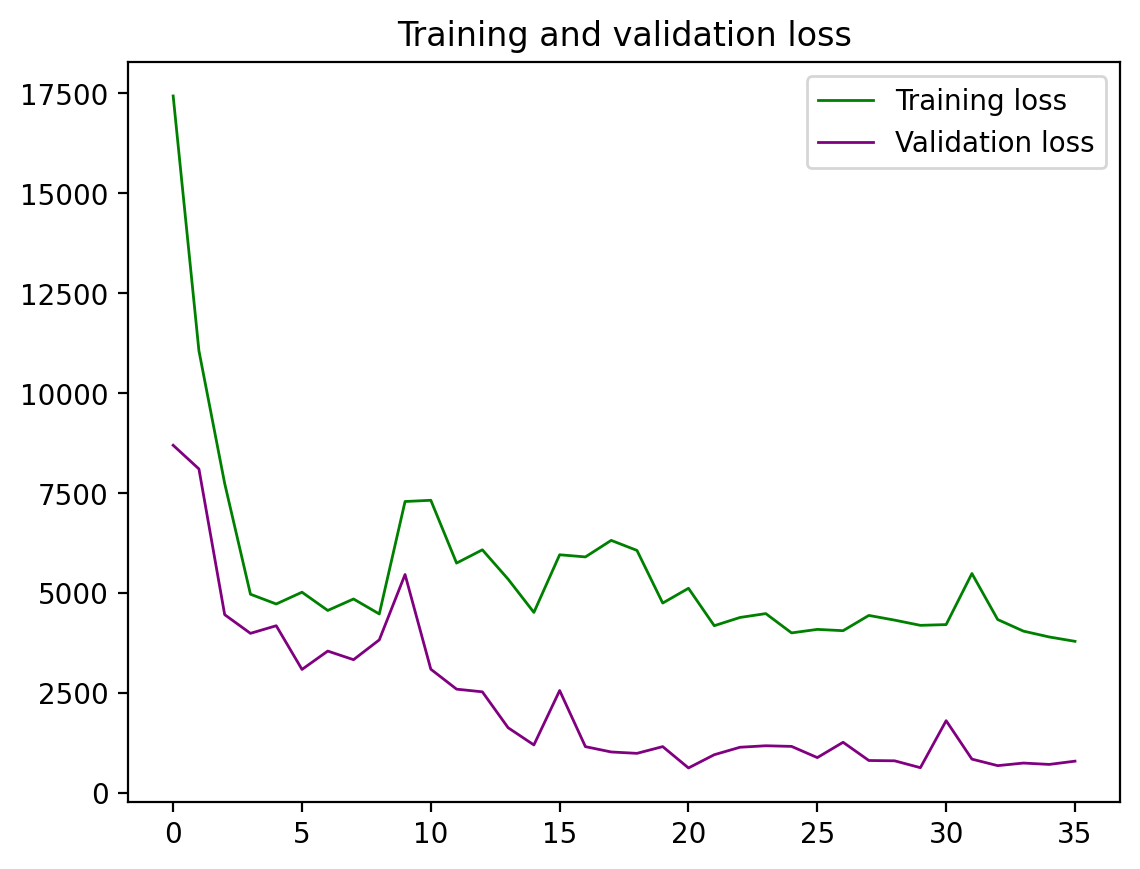

In [61]:
plot_train_history(history,
                   'Training and validation loss')

In [62]:
def plot_train_history(history, title):
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(len(loss))

    plt.figure()

    plt.plot(epochs, loss, 'b', label='Eğitim kayıpları', linewidth=1,color='green')
    plt.plot(epochs, val_loss, 'r', label='Doğrulama kayıpları', linewidth=1,color='purple')
    plt.title(title)
    plt.legend()

    plt.show()

<ipython-input-62-0bab22136887>:9: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(epochs, loss, 'b', label='Eğitim kayıpları', linewidth=1,color='green')
<ipython-input-62-0bab22136887>:10: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r" (-> color=(1.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  plt.plot(epochs, val_loss, 'r', label='Doğrulama kayıpları', linewidth=1,color='purple')


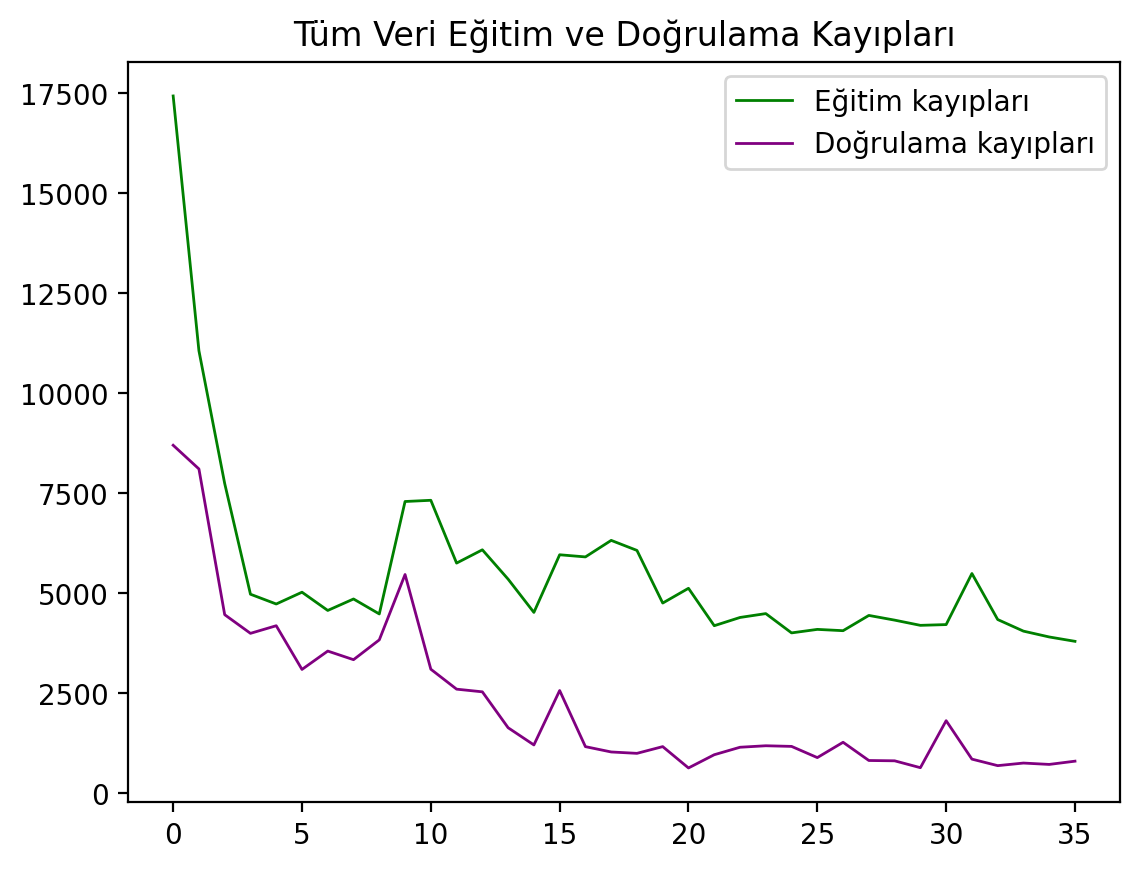

In [72]:
plot_train_history(history,
                   'Tüm Veri Eğitim ve Doğrulama Kayıpları')

In [64]:
# Make predictions
y_pred = model.predict(X_test)

83/83 [==============================] - 1s 4ms/step


In [65]:
y_pred

array([[92.19674],
       [49.69257],
       [75.84166],
       ...,
       [20.5261 ],
       [57.00857],
       [56.63402]], dtype=float32)

In [66]:
y_test

array([[96.593355],
       [42.199583],
       [92.505307],
       ...,
       [22.515943],
       [43.685636],
       [54.753224]])

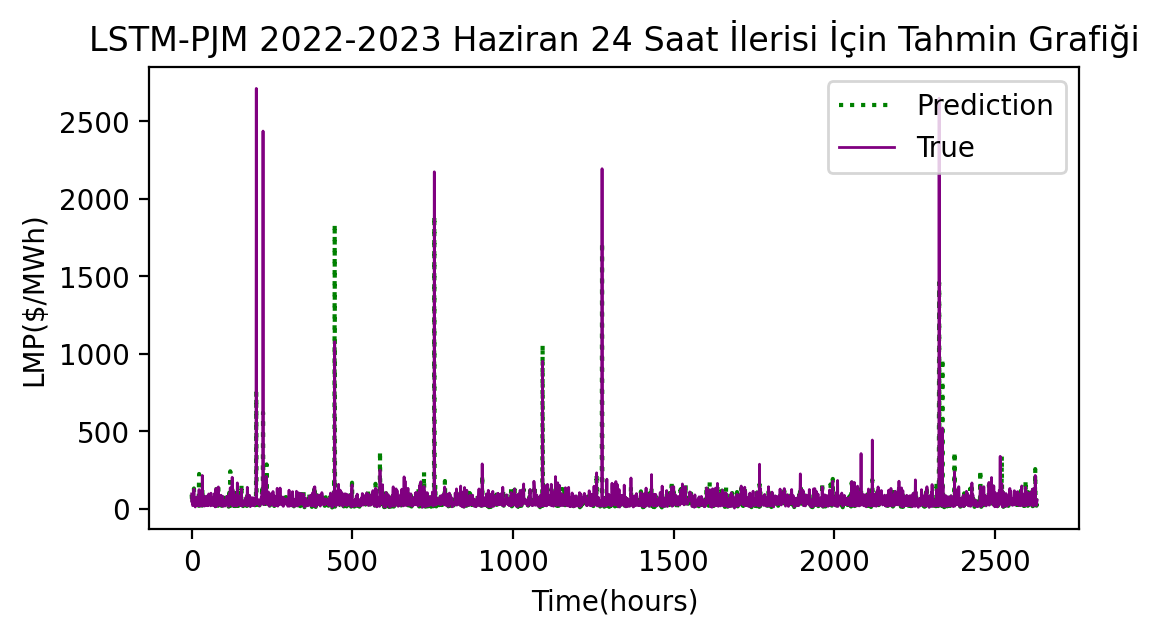

In [67]:
plt.figure(figsize=(6,3))


plt.xlabel('Time(hours)')
plt.ylabel('LMP($/MWh)')
plt.title("LSTM-PJM 2022-2023 Haziran 24 Saat İlerisi İçin Tahmin Grafiği")

hour= 24
n_day = 365
plot_day = hour*n_day

plt.plot(y_pred[:,-1], label='Prediction', linestyle='dotted',color='green')
plt.plot(y_test[:, -1], label='True', linewidth=1,color='purple')
plt.legend()
plt.show()

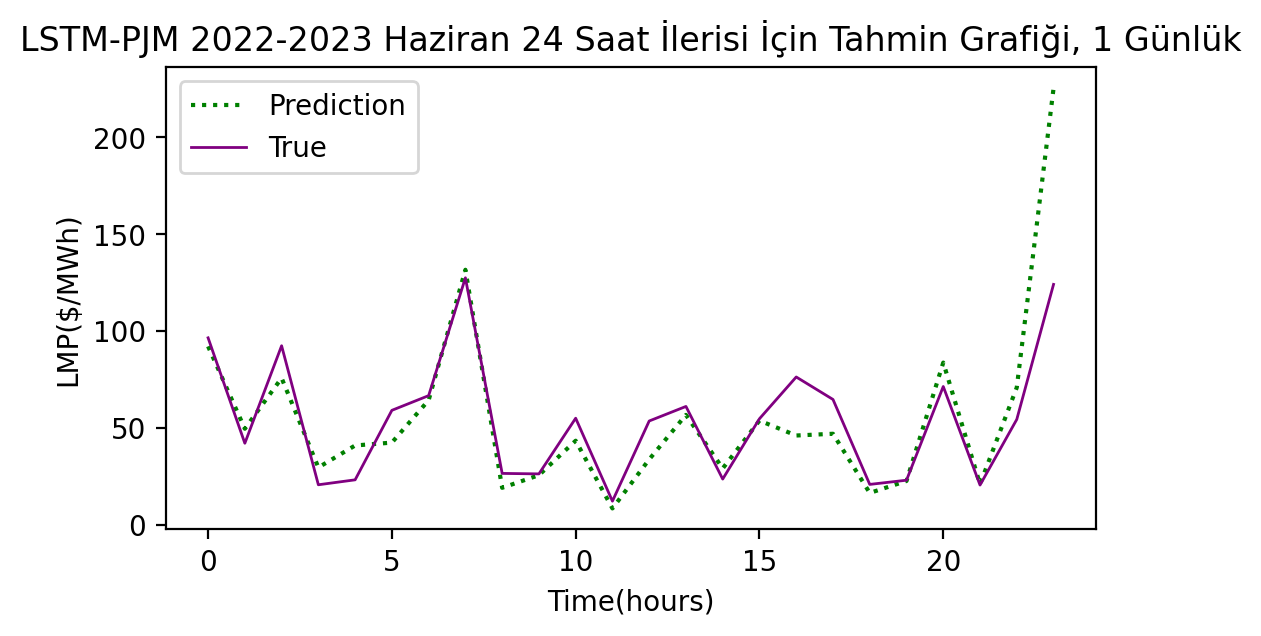

In [68]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,3))
# Reshape the y_pred and y_test arrays to have shape (batch_size,)
y_pred_resized = y_pred[:,-1]
y_test_resized = y_test[:,-1]
plt.xlabel('Time(hours)')
plt.ylabel('LMP($/MWh)')
plt.title("LSTM-PJM 2022-2023 Haziran 24 Saat İlerisi İçin Tahmin Grafiği, 1 Günlük")

hour= 24
n_day = 1
plot_day = hour*n_day

plt.plot(y_pred_resized[0:plot_day], label='Prediction', linestyle='dotted',color='green')
plt.plot(y_test_resized[0:plot_day], label='True', linewidth=1,color='purple')

plt.legend()
plt.show()

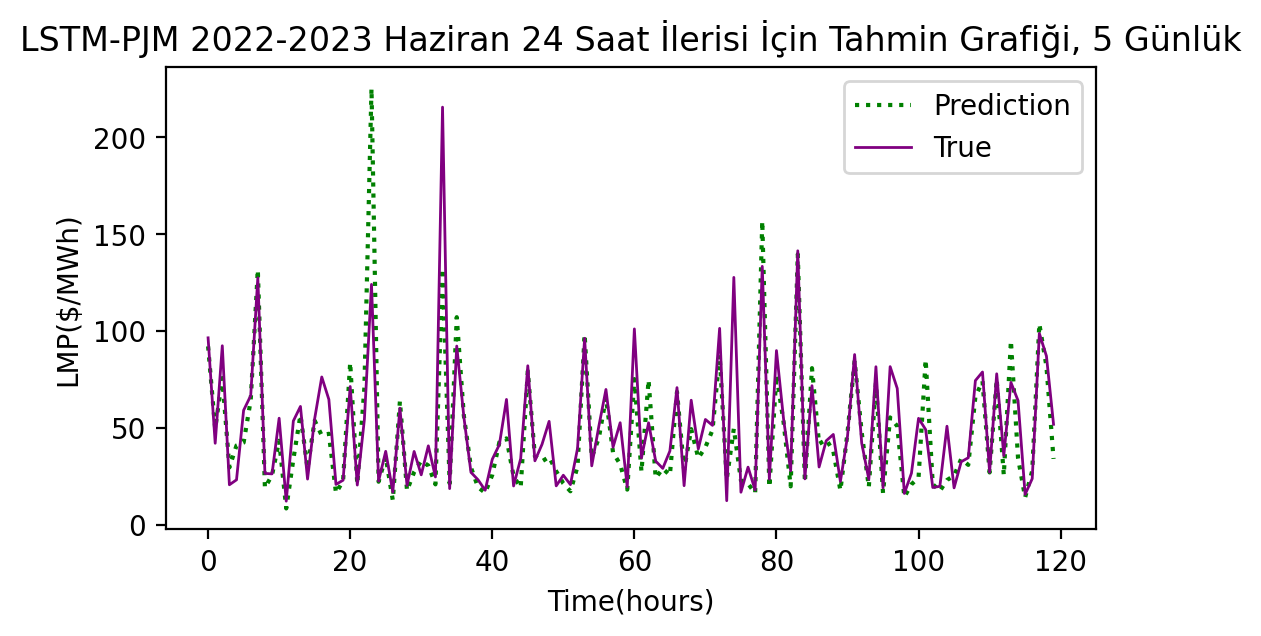

In [69]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,3))
# Reshape the y_pred and y_test arrays to have shape (batch_size,)
y_pred_resized = y_pred[:,-1]
y_test_resized = y_test[:,-1]
plt.xlabel('Time(hours)')
plt.ylabel('LMP($/MWh)')
plt.title("LSTM-PJM 2022-2023 Haziran 24 Saat İlerisi İçin Tahmin Grafiği, 5 Günlük")

hour= 24
n_day = 5
plot_day = hour*n_day

plt.plot(y_pred_resized[0:plot_day], label='Prediction', linestyle='dotted',color='green')
plt.plot(y_test_resized[0:plot_day], label='True', linewidth=1,color='purple')

plt.legend()
plt.show()

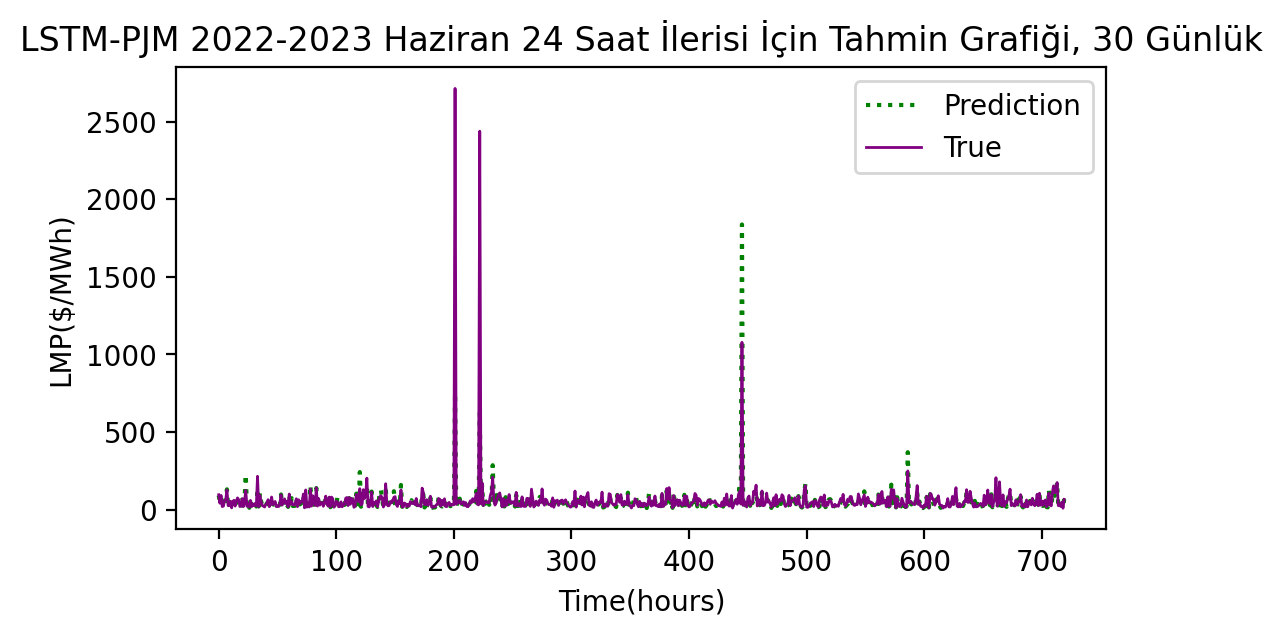

In [70]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,3))
# Reshape the y_pred and y_test arrays to have shape (batch_size,)
y_pred_resized = y_pred[:,-1]
y_test_resized = y_test[:,-1]
plt.xlabel('Time(hours)')
plt.ylabel('LMP($/MWh)')
plt.title("LSTM-PJM 2022-2023 Haziran 24 Saat İlerisi İçin Tahmin Grafiği, 30 Günlük")

hour= 24
n_day = 30
plot_day = hour*n_day

plt.plot(y_pred_resized[0:plot_day], label='Prediction', linestyle='dotted',color='green')
plt.plot(y_test_resized[0:plot_day], label='True', linewidth=1,color='purple')

plt.legend()
plt.show()

In [71]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
errors = y_pred- y_test
mse = np.square(errors).mean()
rmse = np.sqrt(mse)
mae = np.abs(errors).mean()

print('Mean Absolute Error: {:.2f}'.format(mae))
print('Root Mean Square Error: {:.2f}'.format(rmse))
print('R2 Score: ', r2_score(y_test, y_pred))


Mean Absolute Error: 15.06
Root Mean Square Error: 64.09
R2 Score:  0.6828535848489701
